# Keras Tuner 

In [1]:
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


## Restart and Run All cells

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Load the dataset

In [3]:
import pandas as pd
df = pd.read_csv('CANCER.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

## M: Malignant (1) and B : Benign (0)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Seperating X and Y

In [7]:
X = df.drop(columns=['id','Unnamed: 32','diagnosis'])
Y = df[['diagnosis']]

In [8]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
Y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [10]:
Y.value_counts()

diagnosis
B            357
M            212
Name: count, dtype: int64

### Label Encoding on Target feature

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['diagnosis'] = le.fit_transform(Y['diagnosis'])

In [12]:
Y.value_counts()

diagnosis
0            357
1            212
Name: count, dtype: int64

# Preprocessing for X features

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
cols = num_pipe.get_feature_names_out()
cols

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [17]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Train Test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [22]:
xtrain.shape

(398, 30)

In [23]:
xtest.shape

(171, 30)

### Creating model with Keras Tuner

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner as kt

In [25]:
def build_model(hp):
    nn = Sequential()

    hp_units1 = hp.Int('units1',min_value=32, max_value=512, step=32)
    hp_units2 = hp.Int('units2',min_value=32, max_value=512, step=32)
    hp_units3 = hp.Int('units3',min_value=32, max_value=512, step=32)

    nn.add(Dense(hp_units1, activation='relu', input_dim=xtrain.shape[1]))
    nn.add(Dense(hp_units2, activation='relu'))
    nn.add(Dense(hp_units3, activation='relu'))

    nn.add(Dense(1, activation='sigmoid'))

    nn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

    return nn


### Create Hyperband object

In [27]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=20,                 
                     project_name = 'cancer_tuner')

In [28]:
tuner.search(xtrain, ytrain, epochs=30, validation_split=0.2)

Trial 30 Complete [00h 00m 02s]
val_loss: 0.07030218839645386

Best val_loss So Far: 0.00912543386220932
Total elapsed time: 00h 00m 46s
INFO:tensorflow:Oracle triggered exit


### Tuner Hyperparameters

In [33]:
tuner.get_best_hyperparameters()[0].get('units1')

288

In [34]:
tuner.get_best_hyperparameters()[0].get('units2')

512

In [35]:
tuner.get_best_hyperparameters()[0].get('units3')

480

### Best model

In [38]:
best_nn = tuner.get_best_models()[0]
best_nn

In [39]:
best_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 288)               8928      
                                                                 
 dense_1 (Dense)             (None, 512)               147968    
                                                                 
 dense_2 (Dense)             (None, 480)               246240    
                                                                 
 dense_3 (Dense)             (None, 1)                 481       
                                                                 
Total params: 403617 (1.54 MB)
Trainable params: 403617 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate the model

In [40]:
best_nn.evaluate(xtrain, ytrain)

13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000


[0.0020860678050667048, 1.0]

In [41]:
best_nn.evaluate(xtest,ytest)

6/6 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9766


[0.10476624220609665, 0.9766082167625427]

### Predict the data

In [42]:
yprob_tr = best_nn.predict(xtrain)
yprob_ts = best_nn.predict(xtest)

6/6 [==============================] - 0s 2ms/step


In [44]:
yprob_tr[0:5]

array([[4.2709217e-08],
       [4.2689163e-09],
       [5.5365765e-04],
       [4.8005344e-08],
       [3.1688676e-04]], dtype=float32)

In [45]:
ypred_tr = []
for i in yprob_tr:
    if i>=0.5:
        ypred_tr.append(1)
    else:
        ypred_tr.append(0)

In [46]:
ypred_ts = []
for i in yprob_ts:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [47]:
ypred_ts[0:5]

[0, 1, 1, 0, 0]

In [48]:
ytest.head()

,diagnosis
204,0
70,1
131,1
431,0
540,0


### Checking confusion Matrix

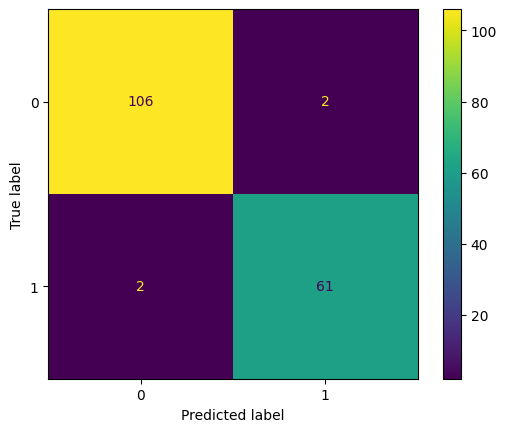

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=[0,1])
cfd.plot()

### Classification Report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Saving the model for future use

In [52]:
best_nn.save('cancer_model.keras')